## Задание 1
### 42 вариант

In [101]:
import numpy as np
from pandas import DataFrame
from numpy.linalg import cond, norm, solve, inv, eig
import matplotlib.pyplot as plt

In [116]:
def a_k(k):
    return k

def b_k(k):
    return k/3

def Vandermonde_matrix(n):
    A = np.zeros((n, n))
    for i in range (n):
        for j in range (n):
            A[i][j] = a_k(i+1) ** b_k(j+1)
    return A  

print(Vandermonde_matrix(3))

[[1.         1.         1.        ]
 [1.25992105 1.58740105 2.        ]
 [1.44224957 2.08008382 3.        ]]


In [117]:
def matrix_root_method(A):
    W, V = eig(A)
    A1 = np.diag(W ** 0.5)
    return V.dot(A1).dot(inv(V))

print(matrix_root_method(Vandermonde_matrix(3)))

[[0.77276521 0.49825773 0.26445415]
 [0.58148638 0.80294053 0.80355234]
 [0.42768792 0.8125886  1.49463664]]


In [6]:
table = []

for i in range (2,18):
    A = Vandermonde_matrix(i)
    B = matrix_root_method(A)
    table.append([i, cond(A), cond(B), norm(A - B.dot(B))])

df = DataFrame(table, columns = ["n", "cond(A)", "cond(B)", "norm(A-B*B)"])  
df

,n,cond(A),cond(B),norm(A-B*B)
0,2,1.859543e+01,4.321623e+00,2.482534e-16
1,3,3.234771e+02,1.801020e+01,1.318317e-15
2,4,6.092365e+03,7.862352e+01,1.156179e-14
3,5,1.265762e+05,3.634385e+02,1.302325e-14
4,6,2.869744e+06,1.767862e+03,2.877385e-14
5,7,6.983141e+07,8.965572e+03,1.099357e-13
6,8,1.798721e+09,4.703482e+04,5.416735e-13
7,9,4.855542e+10,2.537841e+05,8.508865e-13
8,10,1.363842e+12,1.402474e+06,2.807206e-12
9,11,3.964872e+13,7.913705e+06,6.653959e-12


In [7]:
table = []

for i in range (19,34):
    A = Vandermonde_matrix(i)
    B = matrix_root_method(A)
    table.append([i, cond(A), cond(B), norm(A - B.dot(B))])

df = DataFrame(table, columns = ["n", "cond(A)", "cond(B)", "norm(A-B*B)"])  
df

,n,cond(A),cond(B),norm(A-B*B)
0,19,3.528874e+20,2.129485e+10,1.599551e-07
1,20,4.544147e+21,2.232721e+10,2.880328e-06
2,21,1.238273e+22,2.583939e+10,1.151152e-05
3,22,7.665127e+22,1.372302e+10,3.724273e-05
4,23,3.832168e+23,3.875328e+10,2.978036e-04
5,24,1.122999e+23,2.971656e+11,7.468532e-04
6,25,1.044053e+24,1.848613e+11,3.589787e-03
7,26,2.695816e+24,1.154484e+11,4.689873e-02
8,27,3.771293e+24,1.308133e+11,7.530122e-02
9,28,5.043439e+25,8.158233e+10,3.459231e-01


α =  0.1


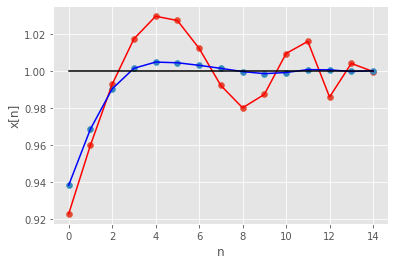

α =  0.001


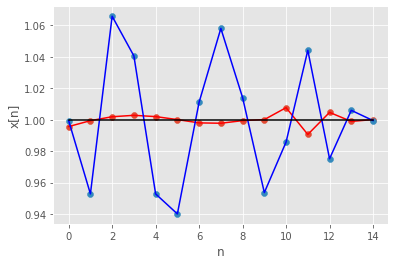

α =  1e-05


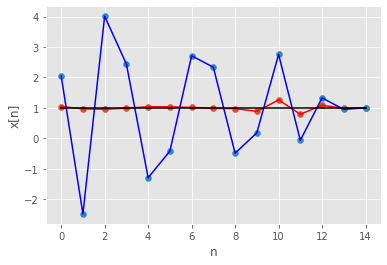

α =  1e-10


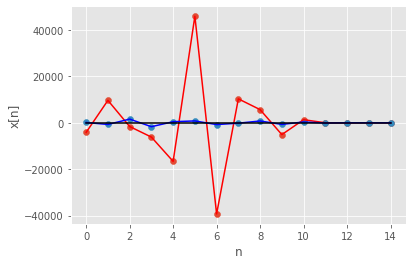

In [121]:
n = 15
A = Vandermonde_matrix(n)
B =  matrix_root_method(A)
z = np.ones(n)
u = np.dot(A, z)
y = np.ones(n)
for i in range(0, n+1):
    x = [k for k in range(i)]


for i in [-1, -3, -5, -10]:
    alpha = 10 ** i

    l = np.dot(A.transpose(), A) + alpha*np.eye(n)
    r = np.dot(A.transpose(), u)
    z_reg = solve(l, r)

    l = np.dot(B.transpose(), B) + alpha*np.eye(n)
    r = np.dot(B.transpose(), np.dot(inv(B), u))
    z_reg2 = solve(l, r)
    
    print("α = ", alpha)
    
    plt.plot(x, z_reg, 'r') 
    plt.scatter(x, z_reg) 
    plt.plot(x, z_reg2, 'b')
    plt.scatter(x, z_reg2)
    plt.plot(x, y, 'k')
    plt.xlabel('n') 
    plt.ylabel('x[n]')   
    plt.show()